Ref: https://datascienceplus.com/how-to-apply-monte-carlo-simulation-to-forecast-stock-prices-using-python/

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,PG
Date,
2020-12-18,0.005698
2020-12-21,-0.010992
2020-12-22,-0.007079
2020-12-23,-0.001539
2020-12-24,0.010071


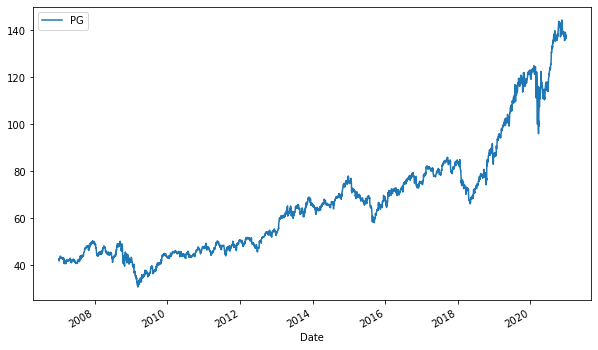

In [4]:
data.plot(figsize=(10, 6));

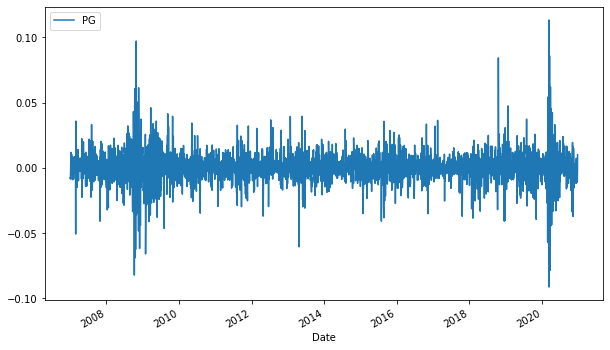

In [6]:
log_returns.plot(figsize = (10, 6));

In [7]:
u = log_returns.mean()
u

PG    0.000333
dtype: float64

In [8]:
var = log_returns.var()
var

PG    0.000141
dtype: float64

In [9]:
drift = u - (0.5 * var)
drift

PG    0.000262
dtype: float64

In [10]:
stdev = log_returns.std()
stdev

PG    0.011884
dtype: float64

In [11]:
type(drift),type(stdev)

(pandas.core.series.Series, pandas.core.series.Series)

In [13]:
np.array(drift),drift.values,stdev.values,norm.ppf(0.95)

(array([0.00026249]),
 array([0.00026249]),
 array([0.01188392]),
 1.6448536269514722)

In [14]:
x = np.random.rand(10, 2)
x

array([[0.12603569, 0.52267018],
       [0.65162313, 0.06797874],
       [0.18228336, 0.05429967],
       [0.94706923, 0.10920486],
       [0.45592629, 0.14237008],
       [0.08971375, 0.39445574],
       [0.08008648, 0.69964464],
       [0.89451803, 0.11344738],
       [0.57232834, 0.64951564],
       [0.80397049, 0.6723733 ]])

In [15]:
norm.ppf(x)

array([[-1.14533268,  0.05685634],
       [ 0.38970629, -1.4910153 ],
       [-0.90669763, -1.60452061],
       [ 1.61707753, -1.2307678 ],
       [-0.11070209, -1.06973157],
       [-1.34251987, -0.26772438],
       [-1.40449009,  0.52337875],
       [ 1.25091926, -1.20839655],
       [ 0.18230508,  0.38401313],
       [ 0.85588931,  0.44647607]])

In [16]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.36646432,  0.0497027 ],
       [-0.56148243,  0.45434683],
       [-0.20037588,  0.14959511],
       [ 0.81988501, -1.85568951],
       [-0.37307335,  0.58773797],
       [ 2.15517887, -0.46963675],
       [ 0.29208707,  0.12322561],
       [ 0.31546643,  0.81762957],
       [ 0.84321503, -1.04367221],
       [-0.73436953, -1.21893864]])

In [17]:
t_intervals = 1000
iterations = 10

In [18]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [19]:
daily_returns

array([[1.00290944, 0.99744679, 0.98465295, ..., 1.02471301, 0.98738562,
        1.01924071],
       [0.99627764, 1.00065654, 0.99138255, ..., 0.98786429, 0.99968074,
        0.99558687],
       [1.01095859, 1.01807383, 0.99844846, ..., 0.99174811, 1.0132778 ,
        0.99398912],
       ...,
       [1.00177322, 1.01177498, 1.00242931, ..., 0.99781238, 0.99641374,
        1.00299345],
       [1.00926892, 1.00075243, 1.02384662, ..., 0.99869403, 1.00253206,
        0.99581826],
       [1.00337307, 1.00736055, 0.98381803, ..., 0.9954588 , 1.01934238,
        0.98836817]])

In [20]:
S0 = data.iloc[-1]
S0

PG    137.720001
Name: 2020-12-24 00:00:00, dtype: float64

In [22]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
price_list[0] = S0
price_list

array([[137.72000122, 137.72000122, 137.72000122, ..., 137.72000122,
        137.72000122, 137.72000122],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [25]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [26]:
price_list

array([[137.72000122, 137.72000122, 137.72000122, ..., 137.72000122,
        137.72000122, 137.72000122],
       [137.20735781, 137.81041996, 136.53320562, ..., 136.0486707 ,
        137.67603245, 137.1122256 ],
       [138.71095654, 140.301182  , 136.32136914, ..., 134.9260116 ,
        139.50406678, 136.28805997],
       ...,
       [203.5061104 , 196.70302642, 220.98837629, ...,  89.02769418,
        215.16511066, 315.6443942 ],
       [205.39239218, 196.85103157, 226.25820169, ...,  88.91142659,
        215.70992118, 314.3244525 ],
       [206.08519524, 198.2999644 , 222.59689789, ...,  88.50766184,
        219.88226343, 310.66828388]])

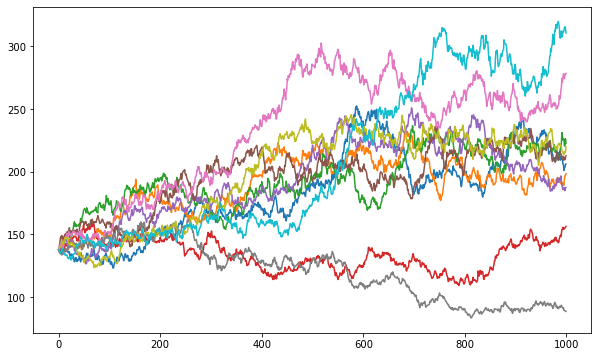

In [27]:
plt.figure(figsize=(10,6))
plt.plot(price_list);